In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
#Base.prepare(engine, reflect=True)
Base.prepare(autoload_with=engine)

In [12]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# To display all columns from station table
[m for m in Station.__table__.columns]

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [10]:
# To display all columns from measurement table
[m for m in Measurement.__table__.columns]

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [11]:
# To Query all data from the Station table
stations = session.query(Station).all()

for station in stations:
    print(f"ID: {station.id}, Station: {station.station}, Name: {station.name}, Latitude: {station.latitude}, "
          f"Longitude: {station.longitude}, Elevation: {station.elevation}")

ID: 1, Station: USC00519397, Name: WAIKIKI 717.2, HI US, Latitude: 21.2716, Longitude: -157.8168, Elevation: 3.0
ID: 2, Station: USC00513117, Name: KANEOHE 838.1, HI US, Latitude: 21.4234, Longitude: -157.8015, Elevation: 14.6
ID: 3, Station: USC00514830, Name: KUALOA RANCH HEADQUARTERS 886.9, HI US, Latitude: 21.5213, Longitude: -157.8374, Elevation: 7.0
ID: 4, Station: USC00517948, Name: PEARL CITY, HI US, Latitude: 21.3934, Longitude: -157.9751, Elevation: 11.9
ID: 5, Station: USC00518838, Name: UPPER WAHIAWA 874.3, HI US, Latitude: 21.4992, Longitude: -158.0111, Elevation: 306.6
ID: 6, Station: USC00519523, Name: WAIMANALO EXPERIMENTAL FARM, HI US, Latitude: 21.33556, Longitude: -157.71139, Elevation: 19.5
ID: 7, Station: USC00519281, Name: WAIHEE 837.5, HI US, Latitude: 21.45167, Longitude: -157.84888999999998, Elevation: 32.9
ID: 8, Station: USC00511918, Name: HONOLULU OBSERVATORY 702.2, HI US, Latitude: 21.3152, Longitude: -157.9992, Elevation: 0.9
ID: 9, Station: USC00516128, N

In [12]:
# To Query all data from the measurements table withou using the column name (help from tutor)
for station in session.query(Station).all():
    row = station.__dict__
    row.pop("_sa_instance_state")
    print(row)
    

{'name': 'WAIKIKI 717.2, HI US', 'longitude': -157.8168, 'station': 'USC00519397', 'latitude': 21.2716, 'id': 1, 'elevation': 3.0}
{'name': 'KANEOHE 838.1, HI US', 'longitude': -157.8015, 'station': 'USC00513117', 'latitude': 21.4234, 'id': 2, 'elevation': 14.6}
{'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'longitude': -157.8374, 'station': 'USC00514830', 'latitude': 21.5213, 'id': 3, 'elevation': 7.0}
{'name': 'PEARL CITY, HI US', 'longitude': -157.9751, 'station': 'USC00517948', 'latitude': 21.3934, 'id': 4, 'elevation': 11.9}
{'name': 'UPPER WAHIAWA 874.3, HI US', 'longitude': -158.0111, 'station': 'USC00518838', 'latitude': 21.4992, 'id': 5, 'elevation': 306.6}
{'name': 'WAIMANALO EXPERIMENTAL FARM, HI US', 'longitude': -157.71139, 'station': 'USC00519523', 'latitude': 21.33556, 'id': 6, 'elevation': 19.5}
{'name': 'WAIHEE 837.5, HI US', 'longitude': -157.84888999999998, 'station': 'USC00519281', 'latitude': 21.45167, 'id': 7, 'elevation': 32.9}
{'name': 'HONOLULU OBSERVATORY

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(type(most_recent_str), most_recent_str)

<class 'str'> 2017-08-23


In [14]:
# Checking the date datetype.
most_recent_date = dt.date.fromisoformat(most_recent_str)
print(type(most_recent_date), most_recent_date)

<class 'datetime.date'> 2017-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

firstday_lastyear = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the datE and precipitation scores
precipation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= firstday_lastyear).all()
precipation_scores



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
precipation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= firstday_lastyear).all()
len(precipation_scores)

2230

In [17]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(precipation_scores, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date')
precipitation_df.head()


,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


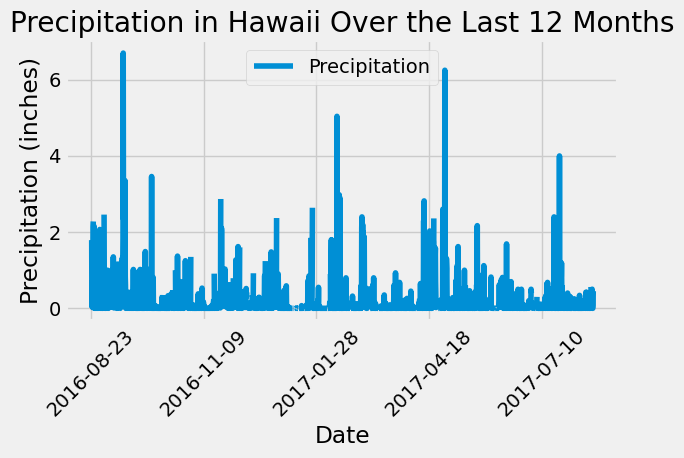

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
#plt.figure(figsize=(10, 6))
#plt.plot(precipitation_df['Date'], precipitation_df['Precipitation'], marker='o', linestyle='-')

precipitation_df.plot(x="Date", y="Precipitation", rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in Hawaii Over the Last 12 Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = precipitation_df['Precipitation'].describe()
print(precipitation_summary)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
print(f"Total number of stations: {total_stations[0][0]}")

Total number of stations: 9


In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
print(f"\nMost active station: {most_active_station}")


Most active station: USC00519281


In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_stats = session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs))\
                           .filter(Measurement.station == most_active_station)\
                           .all()

print(f"\nTemperature stats for station {most_active_station}:")
print(f"Lowest temperature: {temperature_stats[0][0]}")
print(f"Highest temperature: {temperature_stats[0][1]}")
print(f"Average temperature: {temperature_stats[0][2]:.1f}°F")


Temperature stats for station USC00519281:
Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.7°F


In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

firstday_lastyear = most_recent_date - dt.timedelta(days=365)

most_active_station = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= firstday_lastyear).all()
    
#most_active_station

active_station_df = pd.DataFrame(most_active_station, columns=['tobs'])
active_station_df.head()



,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


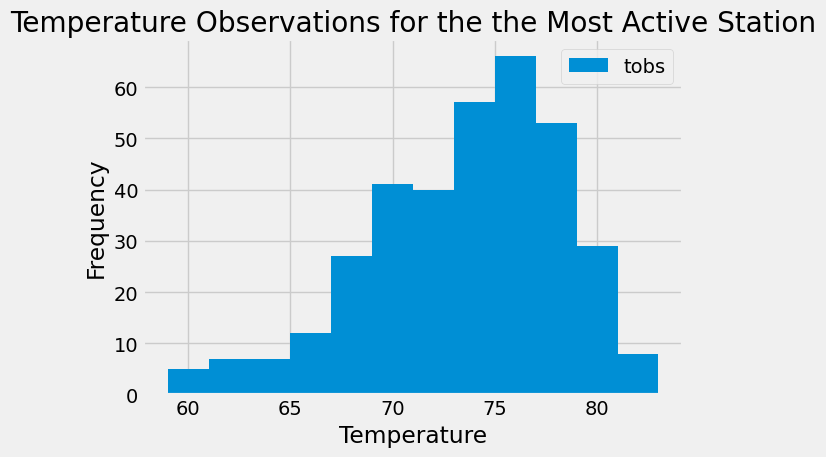

In [35]:
active_station_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for the the Most Active Station')
plt.tight_layout()
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()